# Make bar plots of ROH tracts
Make admixture style plots of ROH, both expected as well as for empirical Individuals

In [1]:
import numpy as np
import os  # For Saving to Folder
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colorbar as clb
import matplotlib.colors as cls
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

import socket
import os as os
import sys as sys
import multiprocessing as mp

### For Arial Font
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the defaul
rcParams['font.sans-serif'] = ['Arial']  # Make sure to have the font installed (it is on cluster for Harald)

socket_name = socket.gethostname()
print(socket_name)
if socket_name == "VioletQueen":
    path = "/home/harald/git/HAPSBURG/"   # The Path on Harald's machine
elif socket_name.startswith("midway2"):
    print("Midway jnovmbre partition detected.")
    path = "/project2/jnovembre/hringbauer/HAPSBURG/"  # The Path on Midway Cluster
elif socket_name.startswith("Harald-Laptop"):
    print("Harald laptop detected.")
    path = "/home/hringbauer/git/HAPSBURG/"  # The Path on Midway Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd()) # Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(f"CPU Count: {mp.cpu_count()}")

sys.path.append("./package") # Append Hapsburg Folder
from hapsburg.PackagesSupport.roh_expectations import Expected_Roh
from hapsburg.figures.plot_bars import plot_panel_row, plot_legend_only, \
                                prepare_dfs_plot, prep_dfs_plot_exact  # See the cunctions at the bottom ("legacy")

midway2-0401.rcc.local
Midway jnovmbre partition detected.
/project2/jnovembre/hringbauer/HAPSBURG
CPU Count: 28


### Single Example for theoretical Expectations [For Supplement]

Saved figure to ./figures/manuscript/barplots/bar_legend.pdf


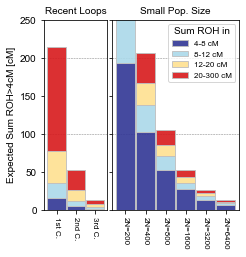

In [4]:
plot_legend_only(savepath="./figures/manuscript/barplots/bar_legend.pdf", 
                 figsize=(3.5,3.5), ylim=[0, 250],
                 c=["#313695", "#abd9e9", "#fee090", "#d7191c"],
                 degrees=[1, 2, 3], hlines=[100, 200, 300, 400], fs_l=8,
                 Ns=[200, 400, 800, 1600, 3200, 6400])

### Legend for main Figure

Saved figure to ./figures/manuscript/barplots/bar_expectations.pdf


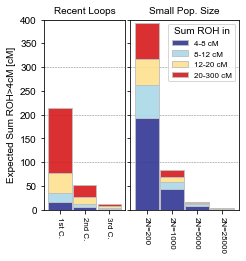

In [7]:
plot_legend_only(savepath="./figures/manuscript/barplots/bar_expectations.pdf", 
                 figsize=(3.5,3.5), ylim=[0, 400],
                 c=["#313695", "#abd9e9", "#fee090", "#d7191c"],
                 degrees=[1, 2, 3], hlines=[100, 200, 300, 400], fs_l=8,
                 Ns=[200, 1000, 5000, 25000])

## Do the Plot for empirical data

### Make a plot of ALL ancient samples

In [2]:
def plot_panel(df1, plot=True, savepath="",  leg_pos=-1, 
               col_sort="sum_roh>4", col_xlabels="iid"):
    """Plot grouped panel"""

    ### Split per pop
    pops = set(df1["pop"])
    df_list = []
    for p in pops:
        df_list.append(df1[df1["pop"]==p].reset_index())

    medians = [np.median(df[col_sort]) for df in df_list]
    idx = np.argsort(medians)
    idx=idx[::-1] # Reverse sort
    df_plots = [df_list[i] for i in idx]
    df_plots = [df.sort_values(by="sum_roh>4", ascending=False) for df in df_plots]
    lgths = [len(df) for df in df_plots]
    
    if len(col_xlabels)>0:
        xlabels = [df[col_xlabels].values for df in df_plots]
    else:
        xlabels = False

    if plot:
        plot_panel_row(df_plots, figsize=(np.sum(lgths)/8, 3.5), ylim=[0,350],
                       ha_title="center", r_title=90, title_col="pop", 
                       hlines=[100, 200, 300], 
                       x_labels=xlabels, leg_pos=leg_pos, degrees=[], Ns=[], 
                       fs_l=8, fs_y=8, fs_x=6, fs_t=8,
                       savepath=savepath)

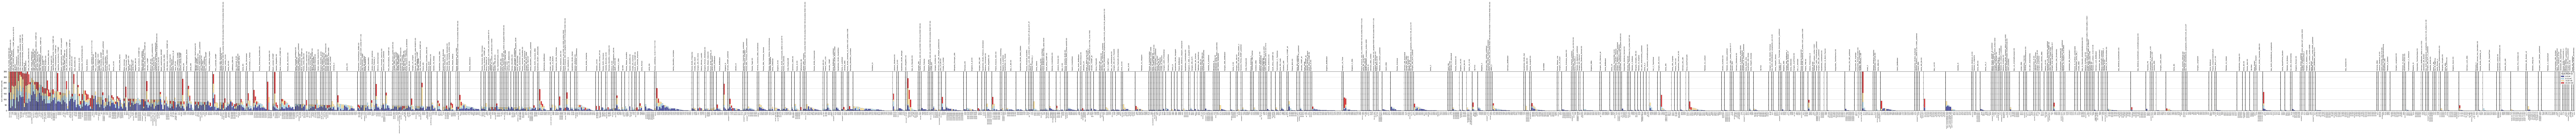

CPU times: user 1min 30s, sys: 38.7 s, total: 2min 9s
Wall time: 1min 17s


In [78]:
%%time
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df1 = df1[df1["age"]>0]
plot_panel(df1, plot=True, savepath="./figures_test/bar_plots_ALL.pdf")

# Plot bar plots per region

In [2]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df1 = df1[df1["age"]>0]
regs = set(df1["region"])
#regs.remove("all")
regs.remove("South Africa")

In [ ]:
#regs = ["all"]
for r in regs:
    df_t = df1[df1["region"]==r].reset_index()
    savepath = os.path.join("./figures/ancient_barplots/", r +".pdf")
    plot_panel(df_t, plot=True, leg_pos=0, savepath=savepath,
               col_sort='age', col_xlabels='age')

In [15]:
### Zip them 
dir_tozip = "./figures/ancient_barplots/"
dir_zip = "./figures/ancient_barplots/regions_fig2.zip"
!zip -r -j $dir_zip $dir_tozip

  adding: Vanuatu.pdf (deflated 26%)
  adding: Britain.pdf (deflated 18%)
  adding: Andean.pdf (deflated 25%)
  adding: East Steppe.pdf (deflated 23%)
  adding: Baltic Sea-checkpoint.pdf (deflated 21%)
  adding: Sardinia.pdf (deflated 26%)
  adding: Black Sea.pdf (deflated 25%)
  adding: East Africa.pdf (deflated 26%)
  adding: all.pdf (deflated 12%)
  adding: Atlantic Coast.pdf (deflated 27%)
  adding: Pacific NW.pdf (deflated 26%)
  adding: North Africa.pdf (deflated 30%)
  adding: Steppe.pdf (deflated 11%)
  adding: Rome.pdf (deflated 22%)
  adding: Baltic Sea.pdf (deflated 21%)
  adding: Pakistan.pdf (deflated 18%)
  adding: Levante.pdf (deflated 25%)
  adding: Patagonia.pdf (deflated 28%)
  adding: Aegan.pdf (deflated 23%)
  adding: Central Europe.pdf (deflated 18%)
  adding: Iberia.pdf (deflated 18%)
  adding: Balkans.pdf (deflated 17%)


In [12]:
#df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
#df1 = df1[df1["age"]>0]
#df1[df1["region"]=="all"][250:300]

,iid,pop,max_roh,sum_roh>4,n_roh>4,sum_roh>8,n_roh>8,sum_roh>12,n_roh>12,sum_roh>20,...,lon,age,study,clst,mean_cov,n_cov_snp,include_alt,region,color,economy


In [ ]:
df_t = df1[df1["region"]==r]

### Roman Data Row

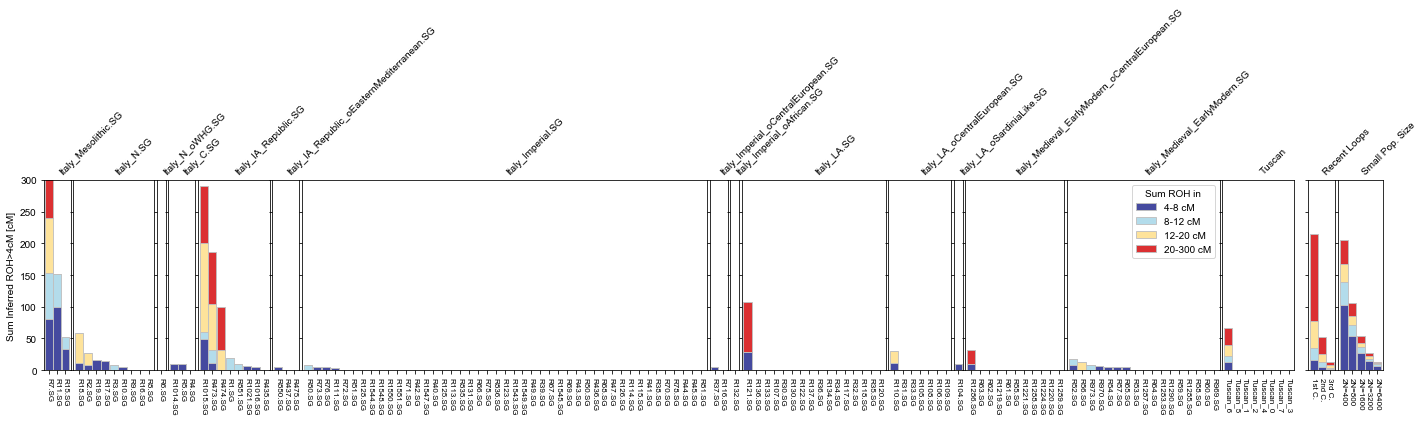

In [4]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df1 = df1[df1["region"]=="Rome"]
plot_dfs, cols = prepare_dfs_plot(df1, cms=[4, 8, 12, 20])

plot_panel_row(plot_dfs, savepath="", #./figures/roman_pilot.png
               wspace=0.035, r_title=45, leg_pos=-2, ylim=[0,300])

## Iberia transect Row

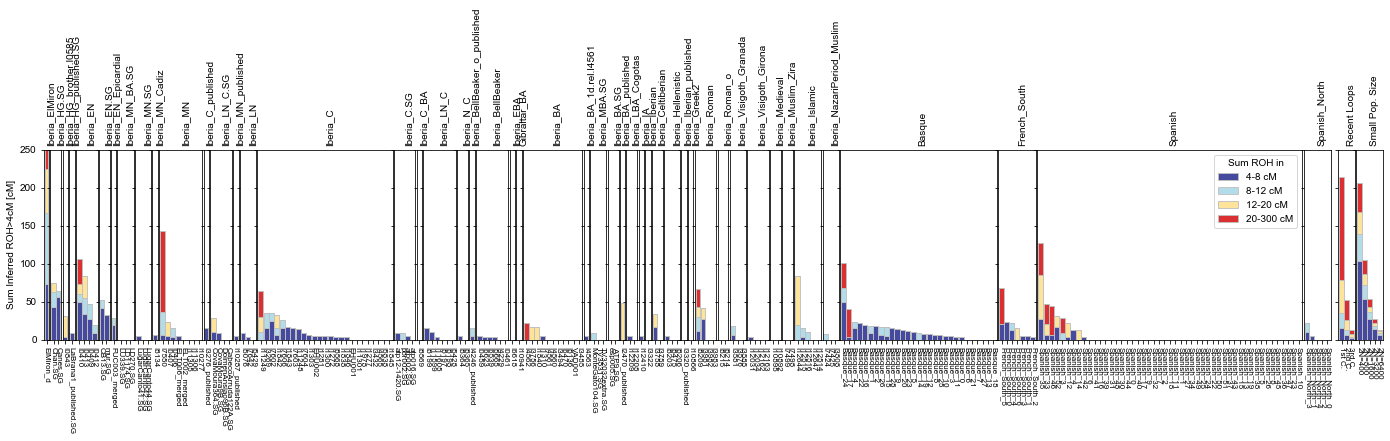

In [5]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df1 = df1[df1["region"]=="Iberia"]
#df1["clst"]=df1["pop"]
plot_dfs1, cols = prepare_dfs_plot(df1, cms=[4, 8, 12, 20])
plot_panel_row(plot_dfs1, savepath="", leg_pos=-2) # ./figures/iberia_pilot.pdf

### Aegan

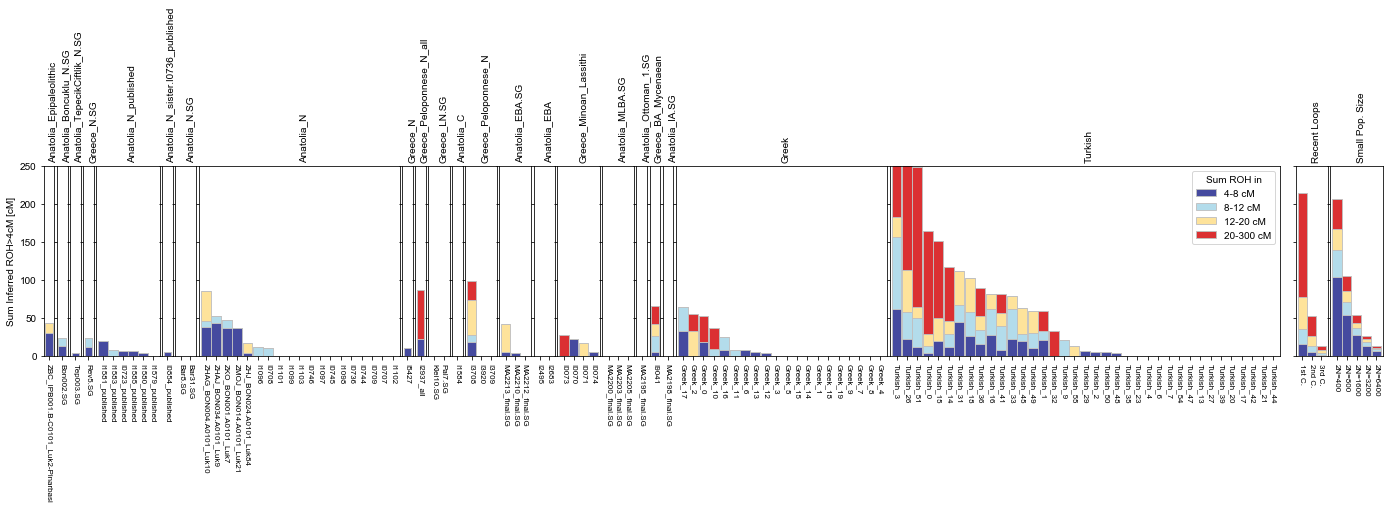

In [4]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df1 = df1[df1["region"]=="Aegan"]
df1["clst"]=df1["pop"]
plot_dfs1, cols = prepare_dfs_plot(df1, cms=[4, 8, 12, 20])
plot_panel_row(plot_dfs1, savepath="", leg_pos=-1) #./figures/aegan_pilot.pdf

In [ ]:
df1.sort_values(by="age", ascending=False)

### Levant

Saved figure to ./figures/levante.pdf


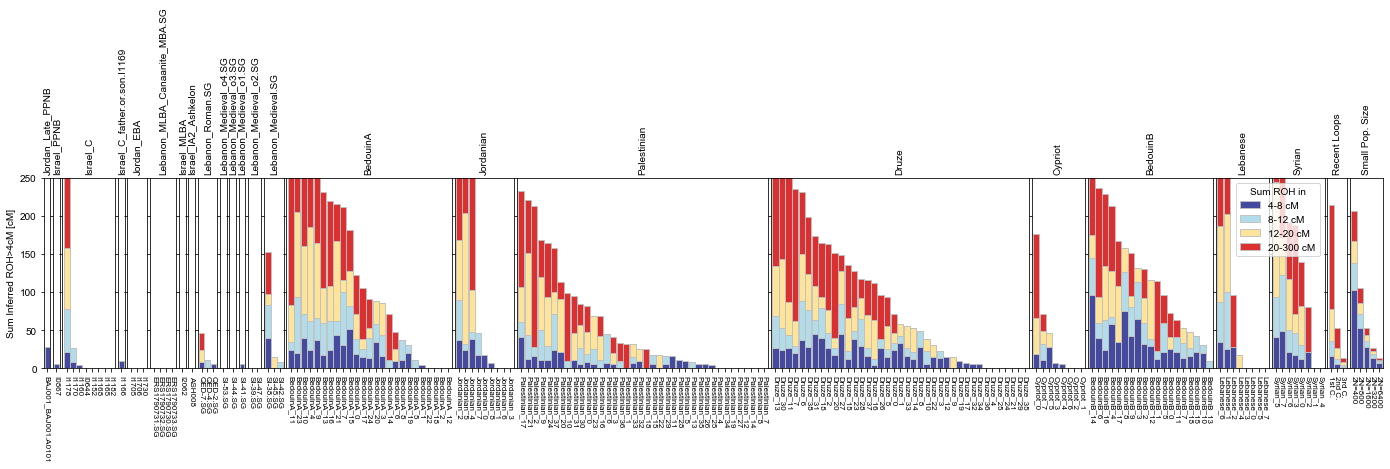

In [37]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df1 = df1[df1["region"]=="Levante"]
df1["clst"]=df1["pop"]
plot_dfs1, cols = prepare_dfs_plot(df1, cms=[4, 8, 12, 20])
plot_panel_row(plot_dfs1, savepath="./figures/levante.pdf", leg_pos=-1)

### Balkans

Saved figure to ./figures_test/balkans.pdf


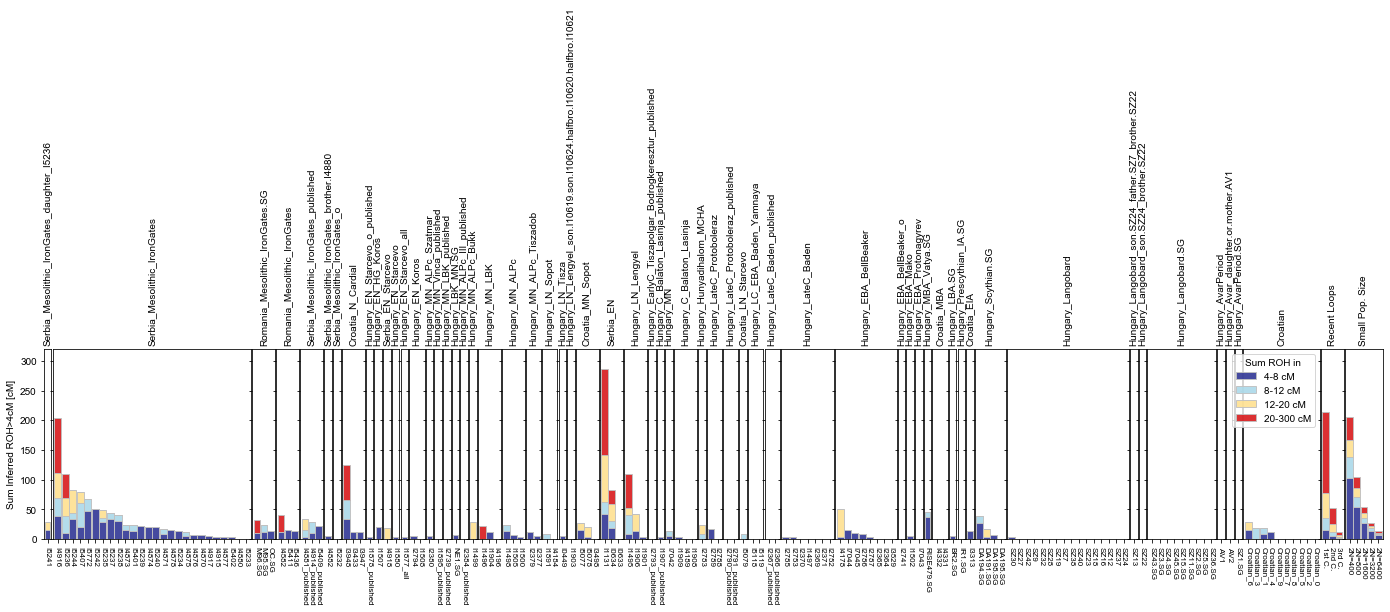

In [28]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df1 = df1[df1["region"]=="Balkans"]
df1["clst"]=df1["pop"]
plot_dfs1, cols = prepare_dfs_plot(df1, cms=[4,8,12,20])
plot_panel_row(plot_dfs1, savepath="./figures_test/balkans.pdf", leg_pos=-1, ylim=[0, 320])

### India/Pakistan/Turkmenistan

3732


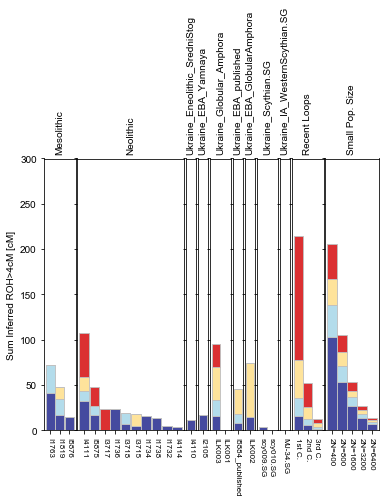

In [20]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
print(len(df1))
df1 = df1[df1["pop"].str.contains("Ukraine")][:]
plot_dfs1, cols = prepare_dfs_plot(df1, cms=[4, 8, 12, 20])
plot_panel_row(plot_dfs1, savepath="", leg_pos=-11, ylim=[0, 300], 
               figsize=((len(df1)+8)/5, 5))

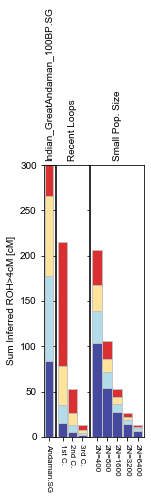

In [14]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df1 = df1[df1["pop"].str.contains("Andaman")]
plot_dfs1, cols = prepare_dfs_plot(df1, cms=[4, 8, 12, 20])
plot_panel_row(plot_dfs1, savepath="", leg_pos=-11, ylim=[0, 300], 
               figsize=((len(df1)+8)/5, 5))

3732


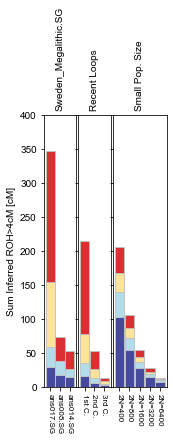

In [10]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
print(len(df1))
df1 = df1[df1["iid"].str.contains("ans0")]
plot_dfs1, cols = prepare_dfs_plot(df1, cms=[4, 8, 12, 20])
plot_panel_row(plot_dfs1, savepath="", leg_pos=-11, ylim=[0, 400], 
               figsize=((len(df1)+8)/5, 5))

8


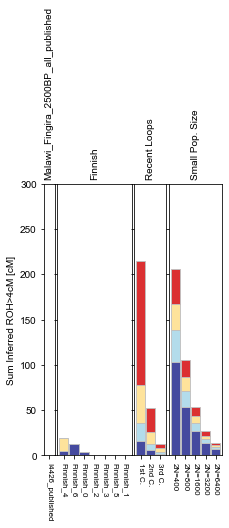

In [44]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df1 = df1[df1["pop"].str.contains("Fin")]
print(len(df1))
plot_dfs1, cols = prepare_dfs_plot(df1, cms=[4, 8, 12, 20])
plot_panel_row(plot_dfs1, savepath="", leg_pos=-11, ylim=[0, 300], 
               figsize=((len(df1)+8)/5, 5))

3732
Saved figure to ./figures_test/islands_roh.pdf


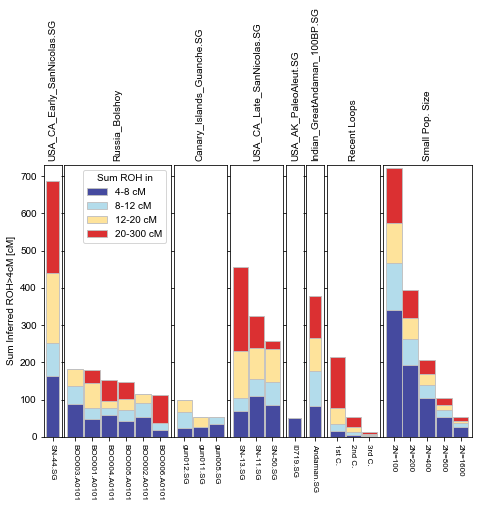

In [43]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
print(len(df1))
#df1 = df1[df1["study"].str.contains("MittnikNatureCommunications2018")]
#df1 = df1[df1["study"].str.contains("Lamnidis")]
df1 = df1[df1["pop"].str.contains("Nicolas|Bolshoy|Guanche|GreatAndaman|PaleoAleut")]
#df1["clst"]=df1["pop"]

plot_dfs1, cols = prepare_dfs_plot(df1, cms=[4, 8, 12, 20])

plot_panel_row(plot_dfs1, savepath="./figures_test/islands_roh.pdf", leg_pos=-5, ylim=[0, 730], 
               figsize=((len(df1)+8)/3, 5), 
               Ns=[100, 200, 400, 800, 1600],
               )

In [ ]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df1.sort_values(by="sum_roh>20", ascending=False)

In [ ]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
print(len(df1))
df1 = df1[df1["study"].str.contains("MittnikNatureCommunications2018")]
#df1 = df1[df1["study"].str.contains("Saag")]
df1["clst"]=df1["pop"]

df1

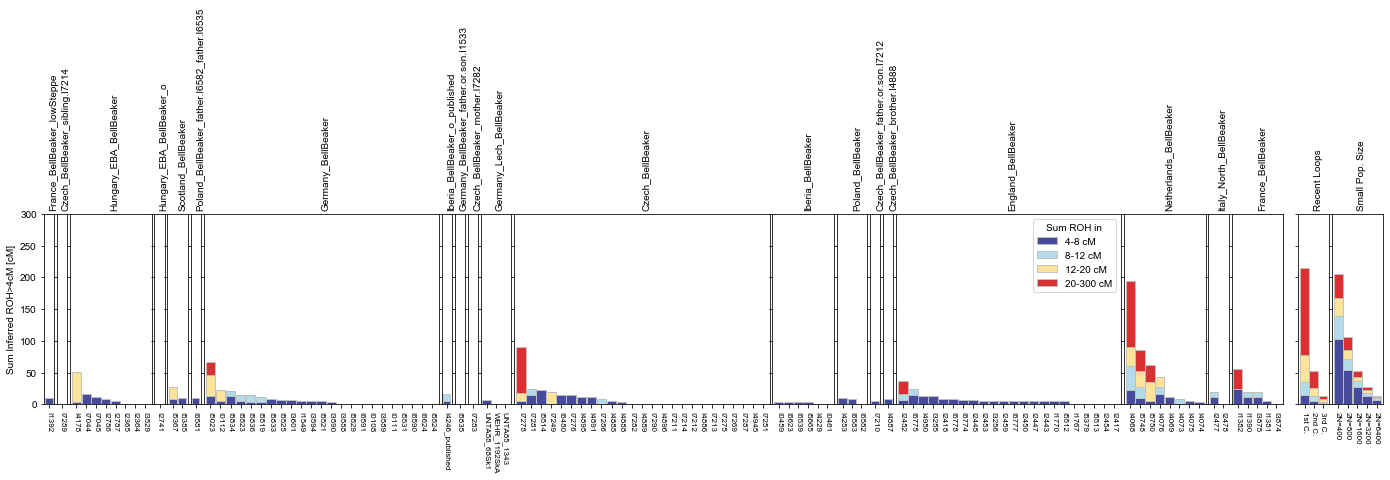

In [33]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df1 = df1[df1["pop"].str.contains("Beaker")]
plot_dfs1, cols = prepare_dfs_plot(df1, cms=[4, 8, 12, 20])
plot_panel_row(plot_dfs1, savepath="", leg_pos=-4, ylim=[0, 300])

## Plot Lazardis Data (11 Individuals)

In [ ]:
df1 = pd.read_csv("./Empirical/Eigenstrat/Reichall/lazaridis11_combined_roh05.csv", sep='\t')
plot_dfs, cols = prepare_dfs_plot(df1, cms=[4, 8, 12, 20])

plot_panel_row(plot_dfs, savepath="./figures_test/lazaridis16_bars.pdf", c=c,
               wspace=0.1, r_title=25, leg_pos=-2, ylim=[0,250], figsize=(9,3.5))

# Human Origins Dataset

### Plot and save every Population

In [ ]:
df1 = pd.read_csv("./Empirical/roh_all_inds.csv", sep='\t')
df1 = df1[df1["age"]==0]  # Extract the modern samples
df1["pop"].value_counts()
pops = set(df1["pop"])

for pop in pops:
    df_t = df1[df1["pop"]==pop].copy()    # Sindhi/Saudi/Makrani/Nganasan/Mozabite
    print(f"Doing Population {pop}: {len(df_t)} Individuals")
    savepath = "./figures/ho_pops_barplots/" + str(pop) + ".pdf" 
    plot_dfs1, cols = prepare_dfs_plot(df_t, cms=[4,8,12])
    plot_panel_row(plot_dfs1, savepath=savepath, leg_pos=-1, ylim=[0,250], 
                   r_title=0, show=False)

### Do them with 4 Length Bins
An additional 20 cM Bin

In [ ]:
df1 = pd.read_csv("./Empirical/HO/CombinedROH/combined_roh05.csv", sep='\t')
#df1 = df1[df1["age"]==0]  # Extract the modern samples
df1["pop"].value_counts()
pops = list(set(df1["pop"]))

for pop in pops[:]:
    df_t = df1[df1["pop"]==pop].copy()    # Sindhi/Saudi/Makrani/Nganasan/Mozabite
    print(f"Doing Population {pop}: {len(df_t)} Individuals")
    savepath = "./figures/ho_pops_barplots/" + str(pop) + ".pdf" 
    plot_dfs1, cols = prepare_dfs_plot(df_t, cms=[4,8,12,20])
    plot_panel_row(plot_dfs1, figsize=((len(plot_dfs1[0])+8)/3, 3.5),
                   savepath=savepath, leg_pos=-1, ylim=[0,250], 
                   r_title=0, show=False, c=c)
    plt.close() # Close all open figures, otherwise PICTOCALYPE
print("Finished!")

# Combine some interesting Pop Rows [Paper]
Strategy: Combine Single Pieces

### Do the Ancient South Americans (+ legend)

### Do key modern Populations (French, Han, Palestinian, Pathan)

Saved figure to ./figures/manuscript/barplots/big_pop.pdf


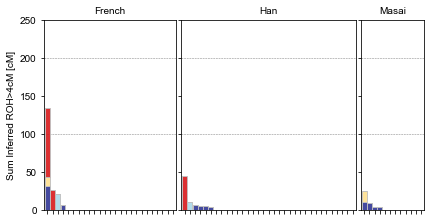

In [2]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
mod_clsts = ["French", "Han", "Masai"]

df_plots, lgths = prep_dfs_plot_exact(df1, pops=mod_clsts, mod_only=True)

plot_panel_row(df_plots, figsize=(np.sum(lgths)/10, 3.5), ylim=[0,250],
               ha_title="center", r_title=0, title_col="pop", hlines=[100, 200], 
               x_labels=False, leg_pos=0, degrees=[], Ns=[], 
               savepath="./figures/manuscript/barplots/big_pop.pdf")

Saved figure to ./figures/manuscript/barplots/cousin_pop.pdf


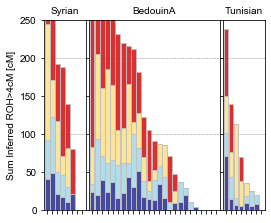

In [3]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
mod_clsts = ["Syrian", "BedouinA", "Tunisian"]

df_plots, lgths = prep_dfs_plot_exact(df1, pops=mod_clsts, mod_only=True)

plot_panel_row(df_plots, figsize=(np.sum(lgths)/10, 3.5), ylim=[0,250],
               ha_title="center", r_title=0, title_col="pop", hlines=[100, 200], 
               x_labels=False, leg_pos=0, degrees=[], Ns=[], 
               savepath="./figures/manuscript/barplots/cousin_pop.pdf")

Saved figure to ./figures/manuscript/barplots/small_pops.pdf


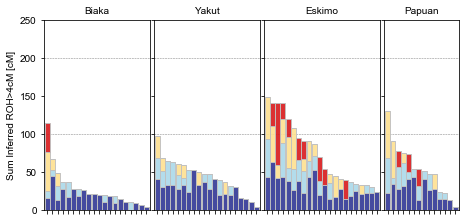

In [4]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df1 = df1.sort_values(by="sum_roh>4", ascending=False)
mod_clsts = ["Biaka", "Yakut", "Eskimo", "Papuan"]

df_plots, lgths = prep_dfs_plot_exact(df1, pops=mod_clsts, mod_only=True)

plot_panel_row(df_plots, figsize=(np.sum(lgths)/10, 3.5), ylim=[0,250],
               ha_title="center", r_title=0, title_col="pop", hlines=[100, 200], 
               x_labels=False, leg_pos=0, degrees=[], Ns=[], 
               savepath="./figures/manuscript/barplots/small_pops.pdf")

# Paper: Plot Key Ancient Populations
Imperial Rome, Mesolithic Steppe, Anatolia N, Iberia Mesolithic, EN, N

# Plot Hunter Gatherer Populations

In [28]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df_t = df1[df1["economy"].values == "Hunter Gatherer"]

Saved figure to ./figures/manuscript/barplots/hg_pops.pdf


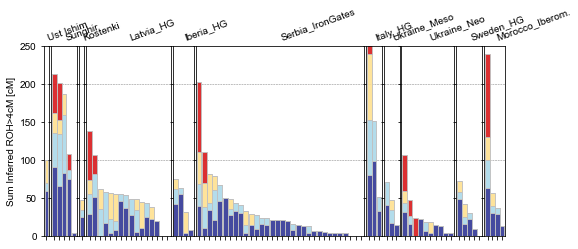

In [29]:
clsts = ["Ust_Ishim",  "Sunghir", "Kostenki", 
         "Latvia_HG", "Iberia_HG", "Serbia_Mesolithic_IronGates", "Italy_Mesolithic", "Ukraine_Mesolithic", 
         "Ukraine_N", "Sweden_HG_Motala", "Morocco_Iberomaurusian"]

labels = ["Ust Ishim", "Sunghir", "Kostenki", "Latvia_HG", "Iberia_HG", 
          "Serbia_IronGates", "Italy_HG", "Ukraine_Meso", 
          "Ukraine_Neo", "Sweden_HG", "Morocco_Iberom."]

df_plots, lgths = prep_dfs_plot_exact(df_t, pops=clsts, mod_only=False, exact=False)

plot_panel_row(df_plots, figsize=(np.sum(lgths)/10, 3.5), ylim=[0,250], fs_x=6,
               titles=labels, ha_title="left", r_title=20, title_col="pop", hlines=[100, 200], 
               x_labels=False, leg_pos=0, degrees=[], Ns=[],
               savepath="./figures/manuscript/barplots/hg_pops.pdf")

TypeError: object of type 'bool' has no len()

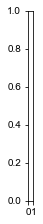

In [32]:
# Hunter Gatherers [not main plot]
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
regions = ["Central Europe", "Balkans", "Iberia", "Black Sea", 
           "Baltic Sea", "Steppe", "Aegan"]

df_plot = df1[(df1["region"].isin(regions)) & (df1["economy"]=="Hunter Gatherer")].copy() # Also select only moderns!
plot_dfs, cols = prepare_dfs_plot(df_plot, col_group="region", mod_group="pop")
plot_panel_row(df_plots, figsize=(np.sum(lgths)/10, 3.5), ylim=[0,250], fs_x=6,
               ha_title="left", r_title=45, title_col="region", hlines=[100, 200], 
               x_labels=True, leg_pos=0, degrees=[], Ns=[],
               savepath="")

# Plot Farmer Populations

In [7]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df_t= df1[df1["economy"]=="Agricultural"]
#df_t[df_t["clst"].str.contains("Sar")]["clst"].value_counts()
#df_t["pop"].value_counts()
#df_t[df_t["clst"].str.contains("Rom")]

In [12]:
df_ana = df_t[df_t["pop"].str.contains("Israel_C")]
idx= df_ana["sum_roh>4"]==0
print(f"{np.sum(idx)} / {len(idx)} Individuals have no ROH")
#np.sum(idx)
#len(idx)

5 / 9 Individuals have no ROH


In [11]:
df_ana.sort_values(by="age")

,iid,pop,max_roh,sum_roh>4,n_roh>4,sum_roh>8,n_roh>8,sum_roh>12,n_roh>12,sum_roh>20,...,lon,age,study,clst,mean_cov,n_cov_snp,include_alt,region,color,economy
1050,I1178,Israel_C,91.121798,703.154187,30,682.380788,26,625.10111,20,545.019401,...,35.331389,5950.0,HarneyMayNatureCommunications2018,Israel_C,2.383,719331,1,Levante,blue,Agricultural
1371,I0644,Israel_C,0.000000,0.000000,0,0.000000,0,0.00000,0,0.000000,...,35.331389,5950.0,HarneyMayNatureCommunications2018,Israel_C,0.869,598616,1,Levante,blue,Agricultural
1375,I1160,Israel_C,4.081202,4.081202,1,0.000000,0,0.00000,0,0.000000,...,35.331389,5950.0,HarneyMayNatureCommunications2018,Israel_C,1.308,597303,1,Levante,blue,Agricultural
1386,I1152,Israel_C,0.000000,0.000000,0,0.000000,0,0.00000,0,0.000000,...,35.331389,5950.0,HarneyMayNatureCommunications2018,Israel_C,1.058,592889,1,Levante,blue,Agricultural
3407,I1168,Israel_C,0.000000,0.000000,0,0.000000,0,0.00000,0,0.000000,...,35.331389,5950.0,HarneyMayNatureCommunications2018,Israel_C,0.985,544900,1,Levante,blue,Agricultural
3450,I1166,Israel_C_father.or.son.I1169,4.879100,9.593799,2,0.000000,0,0.00000,0,0.000000,...,35.331389,5950.0,HarneyMayNatureCommunications2018,Israel_C_father.or.son.I1169,0.981,531821,1,Levante,blue,Agricultural
3596,I1170,Israel_C,9.192801,26.831901,4,18.287802,2,0.00000,0,0.000000,...,35.331389,5950.0,HarneyMayNatureCommunications2018,Israel_C,0.620,467224,1,Levante,blue,Agricultural
3617,I1165,Israel_C,0.000000,0.000000,0,0.000000,0,0.00000,0,0.000000,...,35.331389,5950.0,HarneyMayNatureCommunications2018,Israel_C,0.902,452444,1,Levante,blue,Agricultural
3677,I1182,Israel_C,0.000000,0.000000,0,0.000000,0,0.00000,0,0.000000,...,35.331389,5950.0,HarneyMayNatureCommunications2018,Israel_C,0.584,421398,1,Levante,blue,Agricultural


Saved figure to ./figures/manuscript/barplots/farmer_pops.pdf


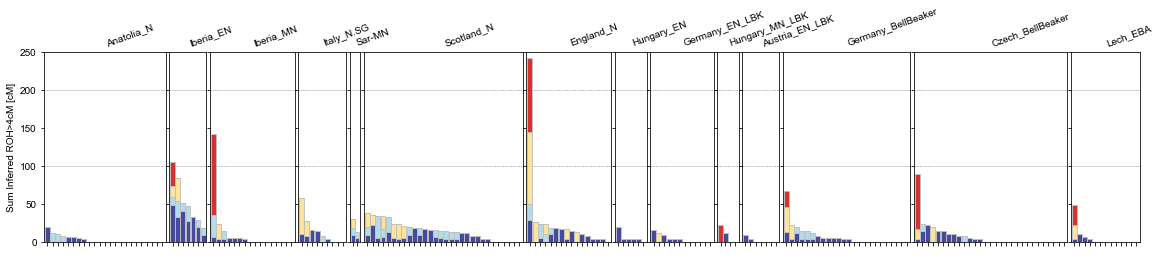

In [48]:
clsts = ["Anatolia_N", "Iberia_EN", "Iberia_MN", "Italy_N.SG", "Sar-MN", "Scotland_N", 
         "England_N", "Hungary_EN",
         "Germany_EN_LBK", "Hungary_MN_LBK", "Austria_EN_LBK", 
         "Germany_BellBeaker", "Czech_BellBeaker", "Lech_EBA"]
df_plots, lgths = prep_dfs_plot_exact(df_t, pops=clsts, mod_only=False, exact=False)

plot_panel_row(df_plots, figsize=(np.sum(lgths)/10, 3.5), ylim=[0,250], fs_x=6,
               ha_title="left", r_title=20, title_col="pop", hlines=[100, 200], 
               titles=clsts, x_labels=False, leg_pos=0, degrees=[], Ns=[],
               savepath="./figures/manuscript/barplots/farmer_pops.pdf")

# Plot the best Steppe has to offer

In [49]:
df_t= df1[df1["economy"]=="Pastoralist"]

Saved figure to ./figures/manuscript/barplots/pastoralist_pops.pdf


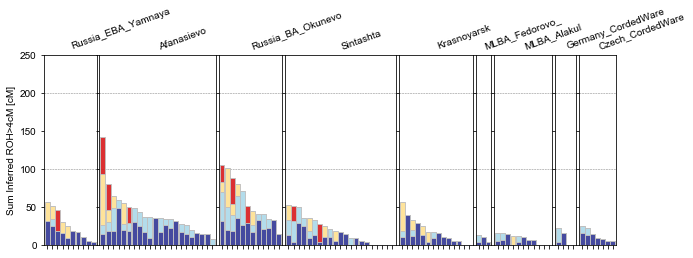

In [50]:
clsts = ["Russia_EBA_Yamnaya", "Afanasievo", "Russia_BA_Okunevo", "Sintashta", 
         "Krasnoyarsk",  "MLBA_Fedorovo_", "MLBA_Alakul", 
         "Germany_CordedWare", "Czech_CordedWare"]
df_plots, lgths = prep_dfs_plot_exact(df_t, pops=clsts, mod_only=False, exact=False)

plot_panel_row(df_plots, figsize=(np.sum(lgths)/10, 3.5), ylim=[0,250], fs_x=6,
               titles=clsts, ha_title="left", r_title=20, title_col="pop", hlines=[100, 200], 
               x_labels=False, leg_pos=0, degrees=[], Ns=[],
               savepath="./figures/manuscript/barplots/pastoralist_pops.pdf")

# Plot island populations

Saved figure to ./figures/manuscript/barplots/islands.pdf


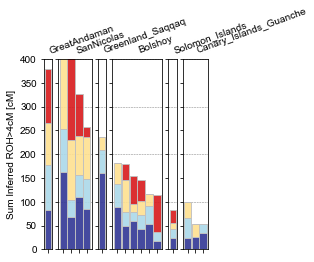

In [76]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
clsts = ["GreatAndaman", "SanNicolas", "Greenland_Saqqaq", "Bolshoy",  
         "Solomon_Islands", "Canary_Islands_Guanche"] # Paleo_ALeut

df_plots, lgths = prep_dfs_plot_exact(df1, pops=clsts, mod_only=False, exact=False)

plot_panel_row(df_plots, figsize=(np.sum(lgths)/5, 3.5), ylim=[0,400], fs_x=6, wspace=0.3,
               titles=clsts, ha_title="left", r_title=20, 
               title_col="pop", hlines=[100,200,300,400], 
               x_labels=False, leg_pos=0, degrees=[], Ns=[],
               savepath="./figures/manuscript/barplots/islands.pdf")

## Plot Americas

In [67]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df1 = df1.sort_values(by="sum_roh>4", ascending=False)

In [70]:
df_patagonia = df1[df1["region"].str.contains("Patagonia") & df1["age"]>0]
df_andean = df1[df1["region"].str.contains("Andea") & df1["age"]>0]
df_pw = df1[df1["region"].str.contains("Pacific") & (~df1["clst"].str.contains("SanNicolas")) & (df1["age"]>0)]
df_at = df1[df1["region"].str.contains("Atlantic Coast") & df1["age"]>0]

df_plots = [df_patagonia, df_andean, df_pw, df_at]
labels = ["Patagonia", "Andean", "Pacific NW", "Atlantic Coast"]
lgths = [len(df) for df in df_plots]

Saved figure to ./figures/manuscript/barplots/sa.pdf


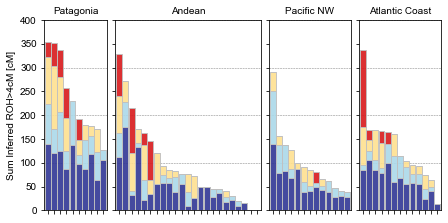

In [60]:
plot_panel_row(df_plots, figsize=(np.sum(lgths)/8, 3.5), ylim=[0,400], fs_x=6, wspace=0.1,
               titles=labels, ha_title="center", r_title=0, 
               title_col="pop", hlines=[100,200,300,400], 
               x_labels=False, leg_pos=0, degrees=[], 
               Ns=[], savepath="./figures/manuscript/barplots/sa.pdf")

# Do Pakistan Populations

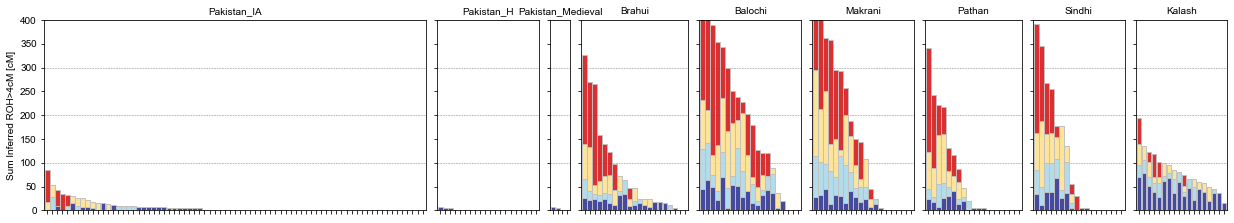

In [89]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
clsts = ["Pakistan_IA", "Pakistan_H", "Pakistan_Medieval", "Brahui", "Balochi", "Makrani", "Pathan", "Sindhi", "Kalash"]

df_plots, lgths = prep_dfs_plot_exact(df1, pops=clsts, mod_only=False, exact=False)

plot_panel_row(df_plots, figsize=(np.sum(lgths)/10, 3.5), 
               ylim=[0,400], fs_x=6, wspace=0.1,
               titles=clsts, ha_title="center", r_title=0, 
               title_col="pop", hlines=[100,200,300,400], 
               x_labels=False, leg_pos=0, degrees=[], Ns=[],
               savepath="")   # ./figures/manuscript/barplots/pakistan.pdf

# Do Levant

In [25]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')

Saved figure to ./figures/manuscript/barplots/levant.png


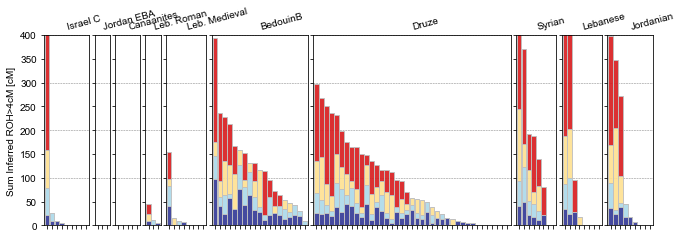

In [26]:
clsts = ["Israel_C", "Jordan_EBA", "Canaanite|Israel_MLBA", "Lebanon_Roman", "Lebanon_Medieval", "BedouinB", "Druze", "Syrian", "Lebanese", "Jordanian"]
labels = ["Israel C", "Jordan EBA", "Canaanites", "Leb. Roman", "Leb. Medieval", "BedouinB", "Druze", "Syrian", "Lebanese", "Jordanian"]
df_plots, lgths = prep_dfs_plot_exact(df1, pops=clsts, mod_only=False, exact=False)

plot_panel_row(df_plots, figsize=(np.sum(lgths)/10, 3.5), 
               ylim=[0,400], fs_x=6, wspace=0.1,
               titles=labels, ha_title="left", r_title=15, 
               title_col="pop", hlines=[100,200,300,400], 
               x_labels=False, leg_pos=0, degrees=[], Ns=[],
               savepath="./figures/manuscript/barplots/levant.png")   # ./figures/manuscript/barplots/levant.png

In [103]:
np.sum(df_pak["sum_roh>20"]>50)

33

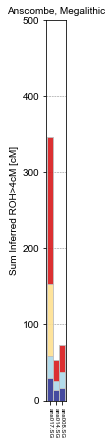

In [109]:
plot_panel_row(df_plots, figsize=(np.sum(lgths)/8, 7), ylim=[0,500], fs_x=6, wspace=0.1,
               titles=labels, ha_title="center", r_title=0, hspace_leg=0,
               title_col="pop", hlines=[100,200,300,400], 
               x_labels=True, leg_pos=0, degrees=[], 
               Ns=[], savepath="")

### Combine barplots panel plots into one folder

In [66]:
dir_tozip = "./figures/manuscript/barplots/"
dir_zip = "./figures/manuscript/barplots/bars.zip"
!zip -r -j $dir_zip $dir_tozip

updating: cousin_pop.pdf (deflated 25%)
updating: farmer_pops.pdf (deflated 20%)
updating: bar_legend.pdf (deflated 29%)
updating: hg_pops.pdf (deflated 22%)
updating: pastoralist_pops.pdf (deflated 22%)
updating: big_pop.pdf (deflated 27%)
updating: small_pops.pdf (deflated 23%)
updating: sa.pdf (deflated 24%)
updating: islands.pdf (deflated 27%)
updating: pakistan-checkpoint.png (deflated 16%)
updating: pakistan.png (deflated 16%)
updating: pakistan.pdf (deflated 19%)


In [ ]:
df = pd.read_csv("./Empirical/roh_all_inds.csv", sep='\t')
df["sum_roh_4-8"]=df["sum_roh>4"]-df["sum_roh>8"]
df.sort_values(by="sum_roh_4-8", ascending=False)[:50]#["sum_roh_4-8"][:50]

In [54]:
#plot_panel_roh_bars([plot_dfs1, plot_dfs], ylim=[0,600], r_title=0, hspace=0.5)

### Plot the Downsampling Experiment

In [9]:
df = pd.read_csv("./Empirical/1240k/SA_Readcounts/Ust_Ishim_rep/combined_roh05.tsv", sep='\t')
df["pop"] = df["pop"].astype("str")
down_sampling_covs = np.linspace(0.2, 1.0, 9)
clsts = [f"{c:.1f}" for c in down_sampling_covs]
titles =[c + "x PH" for c in clsts]
df_plots, lgths = prep_dfs_plot_exact(df, pops=clsts, mod_only=False, exact=False)

Saved figure to ./figures/manuscript/supplement/downsampling_sa/us_ishim_bars.png


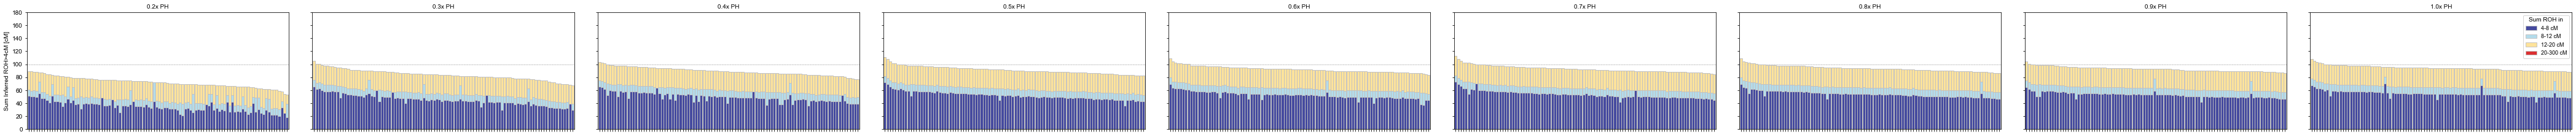

In [10]:
plot_panel_row(df_plots, figsize=(np.sum(lgths)/12, 3.5), 
               ylim=[0,180], fs_x=6, fs_l=9, wspace=0.1,
               titles=titles, ha_title="center", r_title=0, 
               title_col="pop", hlines=[100,200,300,400], 
               x_labels=False, leg_pos=-1, degrees=[], Ns=[],
               savepath="./figures/manuscript/supplement/downsampling_sa/us_ishim_bars.png")   # ./figures/manuscript/barplots/pakistan.pdf

# Plot Close Kin Unions

In [52]:
df = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df_anc = df[df["age"]>0]
df1 = df_anc[df_anc["sum_roh>20"]>50]
plot_dfs, cols = prepare_dfs_plot(df1, cms=[4, 8, 12, 20])

/home/hringbauer/.local/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


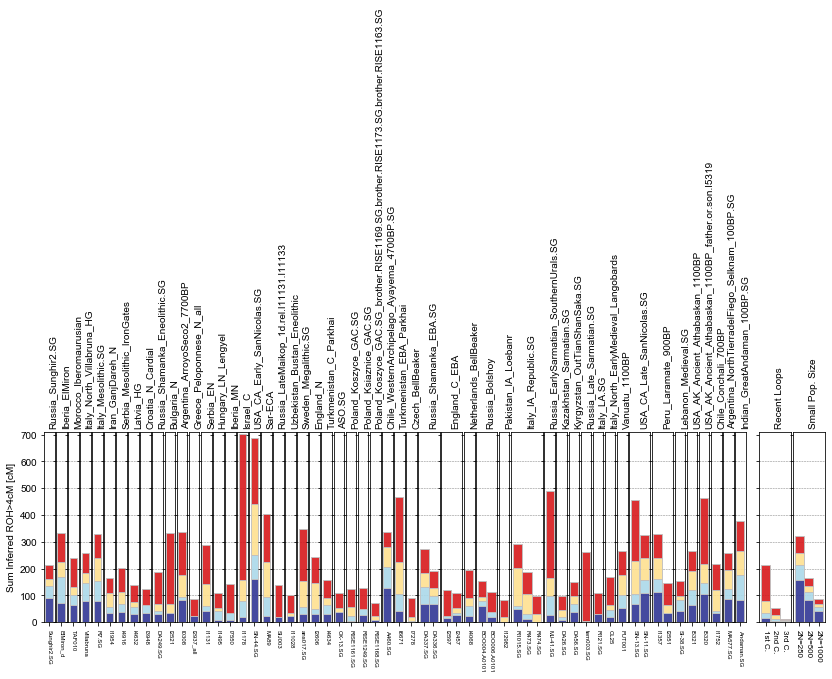

In [50]:
plot_panel_row(plot_dfs, figsize=(np.sum(lgths)/6, 3.5), 
               ylim=[0,710], fs_x=6, wspace=0.1,
               ha_title="left", r_title=90, 
               title_col="pop", hlines=[100,200,300,400,500,600], 
               x_labels=[], leg_pos=0, degrees=[1,2,3], Ns=[250,500,1000,],
               savepath="") 

In [ ]:
df1.sort_values(by="age")

In [4]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df1 = df1[df1["study"].str.contains("BroushakiScience2016")]
plot_dfs, cols = prepare_dfs_plot(df1, cms=[4, 8, 12, 20])

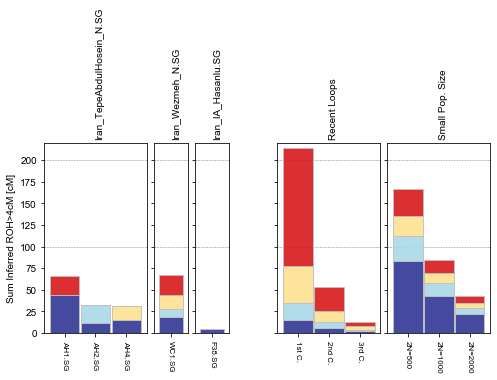

In [12]:
plot_panel_row(plot_dfs, figsize=(8, 3.5), 
               ylim=[0,220], fs_x=8, wspace=0.1,
               ha_title="left", r_title=90, 
               title_col="pop", hlines=[100,200,300,400,500,600], 
               x_labels=[], leg_pos=0, degrees=[1,2,3], Ns=[500, 1000, 2000],
               savepath="") 

## Calculate some Expectations

In [12]:
%%time
bins = [[0.04, 0.08], [0.08, 0.12], [0.12, 0.2], [0.2,3.0]] # 4 bis
#bins = [[0.20,200]]
c=["#313695", "#abd9e9", "#fee090", "#d7191c"] # Colors for 4 bins
Ns=[500, 1400, 10000]
degrees=[1, 2, 3, 4]

### Calcualte Expectations Cousins:
c_roh = create_cousins_roh(degrees = degrees, bins = bins)

### Calculate Expectations Ne:
n_roh = create_Ne_roh(Ns=Ns, bins = bins) # Legacy so that code below works
#std_roh = std_Ne_roh(Ns=Ns, bins = bins)

print(c_roh)
print(n_roh)
#print(std_roh)
#print(std_roh**2)

[[0.15417107 0.1989896  0.42775709 1.36425226]
 [0.0579345  0.06908513 0.13176871 0.26794258]
 [0.01947492 0.02146337 0.03640229 0.05146604]
 [0.0060908  0.00620523 0.00937594 0.00972349]]
[[0.83738322 0.28607663 0.23142621 0.30748262]
 [0.30979281 0.10418639 0.08368305 0.11036552]
 [0.04411506 0.01472364 0.01178546 0.01548821]]
CPU times: user 388 ms, sys: 17 µs, total: 388 ms
Wall time: 386 ms


In [15]:
e_roh = Expected_Roh()
e_roh.exp_roh_len_in_bin_rel(l=[0.0,3.5], m=4, comm_anc=4, bins=10000)

8.802156305686358

In [16]:
e_roh = Expected_Roh()
e_roh.exp_roh_len_in_bin_rel(l=[0.0,3.5], m=3, comm_anc=2, bins=10000)

8.71996812281786

In [21]:
chr_lgts = np.array([2.8426, 2.688187, 2.232549, 2.14201, 2.040477, 1.917145, 1.871491, 1.680018, 
                1.661367, 1.8090949, 1.5821669, 1.745901, 1.2551429, 1.1859521, 1.413411, 
                1.340264, 1.2849959, 1.175495, 1.0772971, 1.082123, 0.636394, 0.724438])

In [20]:
np.sum(chr_lgts)/4

8.847129950000001

In [25]:
np.sum(np.exp(-chr_lgts * 3) * chr_lgts * 1/4)

0.1271703288315191

In [26]:
e_roh.exp_roh_len_in_bin_rel(l=[0.0,3.5], m=3, comm_anc=2, bins=10000) + np.sum(np.exp(-chr_lgts * 3) * chr_lgts * 1/4)

8.84713845164938

# Plot missing coordinates

In [41]:
#df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df1 = pd.read_csv("./Data/ReichLabEigenstrat/Raw/meta.v42.csv", sep=",")
df_bad = df1[df1["lat"].isnull()]
df_counts = pd.DataFrame(df_bad["study"].value_counts())

In [29]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')

In [ ]:
df1[df1["clst"].str.contains("Aleut")]

# Legacy

In [3]:
def plot_bar_ax(ax, fracs, bins=[], c=["#313695", "#abd9e9", "#fee090", "#d7191c"], x_ticks = [], 
                ec = "silver", fs_l=10, fs = 10, fs_x=8, barWidth=0.95, ylim = [0,220], stds = [], title="", 
                yticks=False, legend=False, r_title=0, hlines=[], ylabel="Sum Inferred ROH>4cM [cM]"):
    """Plot bars of ROH on Axis.
    ax: Where to Plot on
    fracs: Fractions of Expected ROH: [n Inds, n Bins]
    c: Which colors to plot
    bins: List of Bins (needed for legend - plotted if len()>0)
    yticks: Whether to plot Y tick Labels
    legend: Whether to plot Legend
    fs_x: Fontsize on the x Labels
    r_title: Rotation of the title
    hlines: List where to plot hlines"""
    y = fracs ### Fractions (along 1st axis length classes)
    x = np.arange(len(y))

    for i in range(len(y[0,:])): # From last to first (For Legend)
        b = np.sum(y[:,:i], axis=1)
        ax.bar(x, y[:,i], bottom=b, color=c[i], edgecolor=ec, width=barWidth, label=f"{bins[i,0]}-{bins[i,1]} cM", alpha=0.9)
        if len(stds)>0 and i>0: # Plot some standard deviations.
            ax1.errorbar(r, b, yerr=stds[:,i], fmt='none', linewidth=2, color="k")
    
    if len(hlines)>0:
        for y in hlines:
            ax.axhline(y=y, zorder=0, linestyle="--", color="gray", lw=0.5)     
    
    if legend:
        ax.legend(fontsize=fs_l, loc="upper right", title="Sum ROH in")
    ax.set_ylabel(ylabel, fontsize=fs)
    ax.set_ylim(ylim)
    ax.set_xlim(x[0] - 0.7*barWidth, x[-1] + 0.7*barWidth)
    if len(x_ticks)>0:
        ax.set_xticks(x)
        ax.set_xticklabels(x_ticks, fontsize=fs_x, rotation=270)
    else:
        ax.set_xticks([])
    if not yticks:
        ax.set_yticklabels([])
        ax.set_ylabel("")
    if len(title)>0:
        ax.set_title(title, fontsize=fs, rotation=r_title)
        
        
def plot_panel_row(plot_dfs, wspace=0.05, hspace=0.01, figsize=(24,3.5), savepath="", x_ticks=True,
                   c=["#313695", "#abd9e9", "#fee090", "#d7191c"], ylim = [0,250], r_title = 90, 
                   leg_pos = -2, show=True, title_col="clst", legends=True, hlines=[],
                   bins = [[0.04, 0.08], [0.08, 0.12], [0.12, 0.2], [0.2, 3.0]],
                   degrees=[1, 2, 3], Ns=[400, 800, 1600, 3200, 6400]):
    """Plot row of ROH bin plots from plot_dfs (each df one panel)
    leg_pos = Where to plot legend (if outside range no legend plot)
    r_title: How much to rotate the title
    gs: Gridspec: If given plot on there.
    legends: Whether to plot the two legends
    hlines: Where to plot horizontal lines
    bins: list of length bins to plot [[a1,a2],...[z1,z2]]
    Ns: What population sizes to plot in barplot [list]
    degrees: What degrees of Cousins to plot. [list]"""
    bins_cM=(np.array(bins)*100).astype("int")
    n_plots = len(plot_dfs)
    width_ratios = [len(df) for df in plot_dfs]
    if legends:     
        n_plots+= 2
        width_ratios+=[len(degrees), len(Ns)]
        
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(1, n_plots, width_ratios=width_ratios, figure=fig)
    
    gs.update(wspace=wspace, hspace=hspace) # set the spacing between axes

    for i,df in enumerate(plot_dfs):   
        if i==0:
            ytick=True
        else:
            ytick=False

        if i == (len(plot_dfs) + leg_pos):
            legend=True
        else:
            legend=False

        ax = plt.subplot(gs[i])    # Extract the Sub Plot to Plot onto
        obs_roh = df[cols].values
        
        ### Calculate the value in the Bins
        for i in range(len(cols)-1):
            obs_roh[:,i] = obs_roh[:,i] - obs_roh[:,i+1]
        
        if x_ticks:
            x_ticks0 = df["iid"].values
        else: 
            x_ticks0 = []
        plot_bar_ax(ax, obs_roh, bins_cM, yticks=ytick, legend=legend, r_title=r_title, c=c,
                    x_ticks = x_ticks0, title=df[title_col].values[0], ylim=ylim, hlines=hlines)

    #### Plot the legend bars
    if legends:
        ### 0) Calculate Expectations
        c_roh = create_cousins_roh(degrees = degrees, bins = bins)
        sum_roh = create_Ne_roh(Ns=Ns, bins = bins)
        
        ### 1) Small Pops
        ax = plt.subplot(gs[-2])    # The left subplot (Timeline)
        plot_bar_ax(ax, c_roh*100, bins_cM, yticks=False, legend=False, ylim=ylim, c=c, hlines=hlines,
                   x_ticks = ["1st C.", "2nd C.", "3rd C."], title="Recent Loops", r_title=r_title)
        ### 2) Cousins
        ax = plt.subplot(gs[-1])
        ticks_N = [f"2N={i}" for i in Ns]
        plot_bar_ax(ax, sum_roh*100, bins_cM, yticks=False, legend=False, ylim=ylim, c=c,
                    hlines=hlines, x_ticks = ticks_N, title="Small Pop. Size", r_title=r_title)

    if len(savepath)>0:
        plt.savefig(savepath, bbox_inches = 'tight', pad_inches = 0, dpi=300)
        print(f"Saved figure to {savepath}")
        
    if show:
        plt.show()
    return
    
    
def plot_legend_only(figsize=(7,6), wspace=0.05, hspace=0.01, savepath="",
                     fs=12, fs_l=10, fs_x=10, c=["#313695", "#abd9e9", "#fee090", "#d7191c"],
                     bins = [[0.04, 0.08], [0.08, 0.12], [0.12, 0.2], [0.2,3.0]],
                     degrees=[1, 2, 3], Ns=[400, 800, 1600, 3200, 6400],
                     ylim=[0,250]
                     ):
    """Plot Inbreeding from recent Cousins as well as small pop size.
    bins: list of length bins to plot [[a1,a2],...[z1,z2]]
    Ns: What population sizes to plot in barplot [list]
    degrees: What degrees of Cousins to plot. [list]"""
    width_ratios = [len(degrees), len(Ns)]
    bins_cM=(np.array(bins)*100).astype("int")
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(1, 2, width_ratios=width_ratios, figure=fig)
    ax_cousin = plt.subplot(gs[0])    # The left subplot (Timeline)
    ax_Ne = plt.subplot(gs[1])
    gs.update(wspace=wspace, hspace=hspace) # set the spacing between axes

    ### Calcualte Expectations Cousins:
    c_roh = create_cousins_roh(degrees = degrees, bins = bins)
    
    ### Calculate Expectations Ne:
    sum_roh = create_Ne_roh(Ns=Ns, bins = bins)
    
    plot_bar_ax(ax_cousin, c_roh*100, bins_cM, yticks=True, legend=False, 
                fs=fs, fs_l=fs_l, fs_x=fs_x, c=c, ylabel="Expected Sum ROH>4cM [cM]",
                x_ticks = ["1st C.", "2nd C.", "3rd C."], title="Recent Loops",
                 ylim=ylim)

    ticks_N = [f"2N={i}" for i in Ns]
    plot_bar_ax(ax_Ne, sum_roh*100, bins_cM, yticks=False, legend=True, c=c, 
                fs=fs, fs_l=fs_l, fs_x=fs_x, x_ticks = ticks_N, 
                title="Small Pop. Size", ylim=ylim)
            
    if len(savepath)>0:
        plt.savefig(savepath, bbox_inches = 'tight', pad_inches = 0, dpi=300)
        print(f"Saved figure to {savepath}") 
    plt.show()
    
    
def prepare_dfs_plot(df, cms=[4,8,12], col_group="clst", split_modern=True,
                     mod_group="pop", sortcol=0):
    """Prepare the Dataframe which to plot
    Return split up (and sorted) list of df, return list of column names
    df: Master Dataframe
    cms: Minimum Length of Chromosomes in bins
    sortcol: By which > column to sort within group [int]
    if split_modern, split age==0 samples by mod_group
    """
    
    if split_modern:
        mod_idx = df["age"]==0  # Pull out modern idx
        df.loc[mod_idx, col_group]=df.loc[mod_idx, mod_group]
        
    plot_dfs = [dft for _, dft in df.groupby(col_group)]
    ### Sort by age
    idx = np.argsort([-df["age"].values[0] for df in plot_dfs])
    plot_dfs = [plot_dfs[i] for i in idx] ## Sort
    
    ### Split up blocks and sort by lowest
    cols = [f"sum_roh>{cm}" for cm in cms]
    for df in plot_dfs:
        df.sort_values(by=cols[sortcol], inplace=True, ascending=False)
    return plot_dfs, cols

In [4]:
def create_cousins_roh(degrees=[1,2,3], 
                       bins=[[0.04,0.08],[0.08,0.12],[0.12,0.2],[0.2,3.0]], bin_n=10000):
    """Create ROH sharing in list of bins (list of [begin,end]) 
    for Cousins of degree degrees [list]
    return sharing [len(degrees), len(bins)]"""
    e_roh = Expected_Roh()
    c_roh = np.zeros((len(degrees),len(bins))) # Container for results Cousins
    for i,c in enumerate(degrees):
        for j,b in enumerate(bins):
            m = c*2 + 4
            c_roh[i,j] = e_roh.exp_roh_len_in_bin_rel(l=b, m=m, comm_anc=4, bins=10000)
    return c_roh

#bins = [[0.04,0.08],[0.08,0.12],[0.12,3.00]]  # The bins I want to plot (eventually maybe do 12,16 as welll)
#cousins = [1, 2, 3]  # Which Cousins to Plot

def create_Ne_roh(Ns=[400, 800, 1600, 3200, 6400], 
                  bins=[[0.04,0.08],[0.08,0.12],[0.12,0.2],[0.2,3.0]], bin_n=10000):
    """Create ROH sharing in list of bins (list of [begin,end]) 
    for panmictic population sizes
    Ns: List of population sizes
    bins: Length Bins (in Morgan) to calculate expectations from
    return sharing [len(degrees), len(bins)]"""
    e_roh = Expected_Roh()
    n_roh = np.zeros((len(Ns),len(bins))) # Container for results Cousins
    for i,N in enumerate(Ns):
        for j,b in enumerate(bins):
            n_roh[i,j] = e_roh.exp_roh_len_in_bin_N(b, N=N, bins=bin_n)
    return n_roh

def std_Ne_roh(Ns=[400, 800, 1600, 3200, 6400], 
                  bins=[[0.04,0.08],[0.08,0.12],[0.12,0.2],[0.2,3.0]], bin_n=10000):
    """Create ROH sharing in list of bins (list of [begin,end]) 
    for panmictic population sizes
    Ns: List of population sizes
    bins: Length Bins (in Morgan) to calculate expectations from
    return sharing [len(degrees), len(bins)]"""
    e_roh = Expected_Roh()
    var_roh = np.zeros((len(Ns),len(bins))) # Container for results Cousins
    for i,N in enumerate(Ns):
        for j,b in enumerate(bins):
            var_roh[i,j] = e_roh.var_roh_len_in_bin_N(b, N=N, bins=bin_n)
    return np.sqrt(var_roh)  # Return Standard Deviation

In [6]:
def plot_panel_2d(plot_dfs, gs=0):
    """Plot 2D Panel of Bar Plots for ROH"""
    raise NotImplementedError("pls do this")

def prep_gridspecs_2d(dim_list, fig, height_ratios=[]):
    """Prepare Gridspec objects.
    Return list of list of axis to plot on. 
    dim_list: List of Dimensions [integer list] for each row)
    fig: Figure Object on where to do it
    height_ratios: Ratios of the Heights of rows"""
    if len(height_ratios)==0:
        height_ratios = [1 for _ in dim_list]
        
    gs = gridspec.GridSpec(len(dim_list), 1, height_ratios=height_ratios, figure=fig)
    
    ax_list = []
    for i,d in enumerate(dim_list):
        gss = gs[i].subgridspec(1, len(d), width_ratios=d)   # Do the width_ratios here!!
        ax_list0 = [plt.subplot(g) for g in gss] # Create Axis Objects
        ax_list.append(ax_list0)
    return ax_list, gs

def plot_panel_roh_bars(plot_dfs, figsize=(24,6), wspace=2.0, hspace=2.0, 
                        ylim=[0,600], r_title=90, leg_pos=-1, bins = [[0.04,0.08], [0.08,0.12], [0.12,3.00]]):
    """Plot a panel of ROH Bars.
    plot_all_dfs: List of dfs to plot"""
    fig = plt.figure(figsize=figsize)
    bins_cM=(np.array(bins)*100).astype("int")
    
    dim_list = [list(map(len,ls)) for ls in plot_dfs]
    ax_list, gs = prep_gridspecs_2d(dim_list, fig)

    gs.update(wspace=wspace, hspace=hspace) # set the spacing between axes

    for j, df_row in enumerate(plot_dfs): 
        for i, df in enumerate(df_row):   
            if i==0:
                ytick=True
            else:
                ytick=False

            if i == (len(df_row) + leg_pos):
                legend=True
            else:
                legend=False

            ax = ax_list[j][i]
            obs_roh = df[cols].values
            obs_roh[:,0] = obs_roh[:,0] - obs_roh[:,1]
            obs_roh[:,1] = obs_roh[:,1] - obs_roh[:,2]
            obs_roh[:,2] = obs_roh[:,2]

            plot_bar_ax(ax, obs_roh, bins_cM, yticks=ytick, legend=legend, r_title=r_title,
                        x_ticks = df["iid"].values, title=df["clst"].values[0], ylim=ylim)
    plt.show()

# Area 51

In [67]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df2 = df1[df1["age"]>0]
df3 = df2[df2["region"]=="Steppe"]

In [50]:
idx = (df3["age"]>1500) & (df3["age"]<2600)
df3[idx]["clst"].value_counts()

Kyrgyzstan_TianShanHun.SG                      12
Kyrgyzstan_TianShanSaka.SG                      5
Kazakhstan_Kangju.SG                            4
Russia_Late_Sarmatian.SG                        4
Kazakhstan_CentralSaka.SG                       4
Russia_IA.SG                                    3
Kazakhstan_IA_Berel_Pazyryk                     2
Kazakhstan_Nomad_HP.SG                          2
Kazakhstan_Sarmatian.SG                         2
Kazakhstan_OutTurk.SG                           1
Kazakhstan_Wusun_2.SG                           1
Kyrgyzstan_TianShanSaka.SG_brother.DA57.SG      1
Kazakhstan_Nomad_Hun_Sarmatian.SG               1
Russia_EarlySarmatian_SouthernUrals.SG          1
Russia_MiddleSarmatian_SouthernUrals.SG         1
Russia_IA_EarlySarmatian                        1
Kyrgyzstan_TianShanHun.SG_son.DA104.SG          1
Russia_IA_Scythian_questionable                 1
Kazakhstan_Wusun.SG                             1
Kazakhstan_IA_Chanchar_published                1


In [34]:
df2["region"].value_counts()[:40]

Steppe            315
all               250
Central Europe    149
Balkans           149
Britain           139
Pakistan          138
Iberia            137
Rome              127
Baltic Sea         66
Aegan              55
East Steppe        49
Sardinia           49
Levante            31
Black Sea          27
Andean             23
East Africa        23
Pacific NW         17
Vanuatu            17
Atlantic Coast     13
Patagonia          10
South Africa        8
North Africa        6
Name: region, dtype: int64

In [27]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
#df1[df1["clst"].str.contains("")]  # Republic

In [29]:
df1.sort_values(by="sum_roh>20")

,iid,pop,max_roh,sum_roh>4,n_roh>4,sum_roh>8,n_roh>8,sum_roh>12,n_roh>12,sum_roh>20,...,lon,age,study,clst,mean_cov,n_cov_snp,include_alt,region,color,economy
0,BR2.SG,Hungary_LBA.SG,5.221403,5.221403,1,0.000000,0,0.000000,0,0.000000,...,19.950000,3140.0,GambaNatureCommunications2014,Hungary_LBA.SG,19.164,1182644,1,Balkans,blue,Agricultural
2387,Somali_12,Somali,0.000000,0.000000,0,0.000000,0,0.000000,0,0.000000,...,48.300000,0.0,Lazaridis et al. 2014,Modern,NaN,555027,1,Somali,yellow,NaN
2388,Mandenka_16,Mandenka,0.000000,0.000000,0,0.000000,0,0.000000,0,0.000000,...,-12.000000,0.0,Lazaridis et al. 2014,Modern,NaN,555026,1,Mandenka,yellow,NaN
2389,Makrani_5,Makrani,17.800697,108.823911,10,84.053903,6,60.457605,4,0.000000,...,64.000000,0.0,Lazaridis et al. 2014,Modern,NaN,555024,1,Central Asia,yellow,NaN
2390,Balochi_2,Balochi,0.000000,0.000000,0,0.000000,0,0.000000,0,0.000000,...,66.500000,0.0,Lazaridis et al. 2014,Modern,NaN,555023,1,Central Asia,yellow,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3404,Surui_1,Surui,83.238797,571.983341,33,486.853216,18,447.016210,14,333.080091,...,-62.000000,0.0,Lazaridis et al. 2014,Modern,NaN,546003,1,Atlantic Coast,yellow,NaN
2527,Pima_11,Pima,124.891199,543.410879,30,495.179579,21,422.557495,13,337.027990,...,-108.000000,0.0,Lazaridis et al. 2014,Modern,NaN,554855,1,Pima,yellow,NaN
3137,Lebanese_6,Lebanese,59.008193,546.006877,29,511.061079,23,458.984076,18,358.673575,...,35.600000,0.0,Lazaridis et al. 2014,Modern,NaN,553090,1,Levante,yellow,NaN
3081,Karitiana_11,Karitiana,71.722305,596.386334,37,494.799619,20,455.792115,16,392.679617,...,-63.000000,0.0,Lazaridis et al. 2014,Modern,NaN,553410,1,Karitiana,yellow,NaN


In [58]:
df1 = pd.read_csv("./Empirical/roh_all_inds_final_v42.csv", sep='\t')
df2 = df1[df1["age"]>0]

In [64]:
df3 = df2[df2["sum_roh>20"]>50]

In [65]:
df3["region"].value_counts()

all               15
Steppe             6
Rome               5
Balkans            4
East Steppe        3
Andean             3
Britain            3
Central Europe     3
Pacific NW         3
Baltic Sea         2
Iberia             2
Levante            2
Patagonia          2
Sardinia           1
Aegan              1
Atlantic Coast     1
Pakistan           1
North Africa       1
Vanuatu            1
Name: region, dtype: int64

In [66]:
len(df3)

59

In [39]:
315 + 149 + 149 + 139 + 138 + 137 + 127 + 66 + 55 + 49 + 49 + 31 + 27 + 23 + 23 + 17 + + 17 + 13 + 10

1534

In [40]:
250 + 8 + 6

264

In [38]:
len(df2)

1798

In [ ]:
df2[df2["region"].str.contains("Steppe")][:50]

In [22]:
df2 = df1.sort_values(by="sum_roh>20", ascending=False)

In [ ]:
df2[df2["region"].str.contains("Steppe")][:50]

In [ ]:
df_test = df1[df1["clst"].str.contains("Israel_C")]
df_test["lon"]